
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [2]:
student_number = '400101323'
first_name = 'Mahdi'
last_name = 'Zinati'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [4]:
df = pd.read_csv('spotify.csv')
df.head()
rlv_feat = ['track_name', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
df = df[rlv_feat]
df.dropna(inplace=True)

In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

Using a standard scaler is crucial in clustering because it ensures that all features contribute equally to the distance calculations. Without scaling, features with larger ranges can dominate, leading to biased and inaccurate clustering results. This can cause the clustering algorithm to form clusters based on high-variance features, potentially ignoring important patterns in other features. Standard scaling improves the performance and convergence of clustering algorithms, resulting in more meaningful and interpretable clusters.

In [24]:
class Scaler:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
    
    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_tr(self, X):
        self.fit(X)
        return self.transform(X)

feats = df.drop('track_name', axis=1).values
scaled_feats = scaler.fit_tr(feats)
scaled_df = pd.DataFrame(scaled_feats, columns=df.columns[1:])


# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

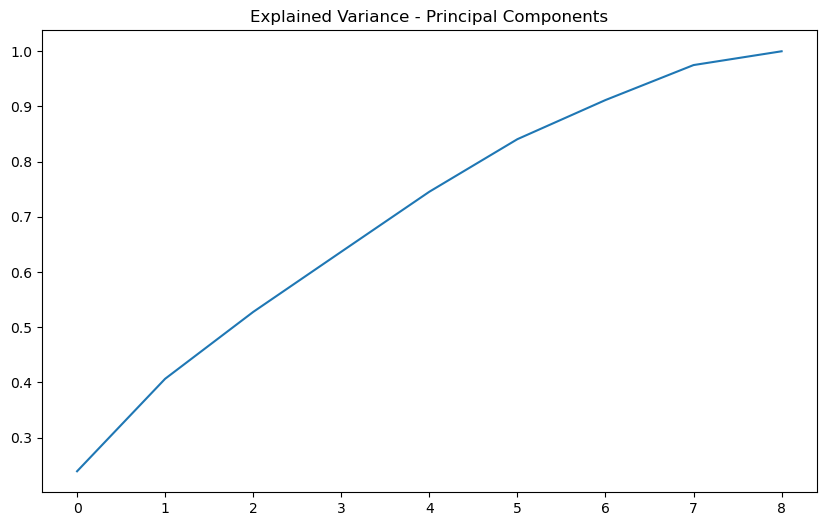

retaining components: 7
[[-1.5392986  -0.54785289 -0.82440299 ... -0.30644239 -0.49352774
  -0.48250416]
 [-1.07366326 -0.6868663  -0.32653508 ...  1.41666948  0.63016889
   0.14359927]
 [-1.61515955 -0.43388871 -0.48484116 ... -0.20676004 -0.10234801
  -0.41354376]
 ...
 [-0.93507407  0.80184055 -0.06634605 ... -0.01942602 -0.18667597
  -0.14623345]
 [-1.75259758  0.84152824  0.25495028 ...  0.45334844 -0.40727922
  -0.05235944]
 [-1.80195418  2.39998714  0.63649722 ...  2.04131447  0.52885832
   0.33584265]]


In [38]:
pca = PCA()
pca_feats = pca.fit_transform(scaled_feats)
evr = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(evr))
plt.title('Explained Variance - Principal Components')
plt.show()

n = np.argmax(np.cumsum(evr) >= 0.9) + 1
print("retaining components:",n)

pca = PCA(n_components=n)
rdc_feats = pca.fit_transform(scaled_feats)
print(rdc_feats)

# Clustering

Implement K-means for clustering from scratch.

In [48]:
class KMeans:
    def __init__(self, num_clusters, iterations=300, tolerance=1e-4):
        self.num_clusters = num_clusters
        self.iterations = iterations
        self.tolerance = tolerance
    
    def fit(self, data):
        np.random.seed(42)
        random_indices = np.random.permutation(data.shape[0])
        self.centroids = data[random_indices[:self.num_clusters]]
        
        for iteration in range(self.iterations):
            self.cluster_assignments = self._assign_clusters(data)
            new_centroids = self._compute_centroids(data) 
            if np.all(np.abs(new_centroids - self.centroids) < self.tolerance):
                break
            self.centroids = new_centroids
    
    def _assign_clusters(self, data):
        distances = self._compute_distances(data, self.centroids)
        print(f"Distances matrix shape: {distances.shape}")  
        return np.argmin(distances, axis=0)
    
    def _compute_distances(self, data, centroids):
        return np.sqrt(((data - centroids[:, np.newaxis]) ** 2).sum(axis=2))
    
    def _compute_centroids(self, data):
        centroids = []
        for cluster_index in range(self.num_clusters):
            points_in_cluster = data[self.cluster_assignments == cluster_index]
            print(f"Cluster {cluster_index} data points shape: {points_in_cluster.shape}")  
            if points_in_cluster.shape[0] == 0:
                print(f"Warning: Cluster {cluster_index} has no points.")
                centroid = np.zeros(data.shape[1])
            else:
                centroid = points_in_cluster.mean(axis=0)
            centroids.append(centroid)
        return np.array(centroids)
    
    def predict(self, data):
        return self._assign_clusters(data)

Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


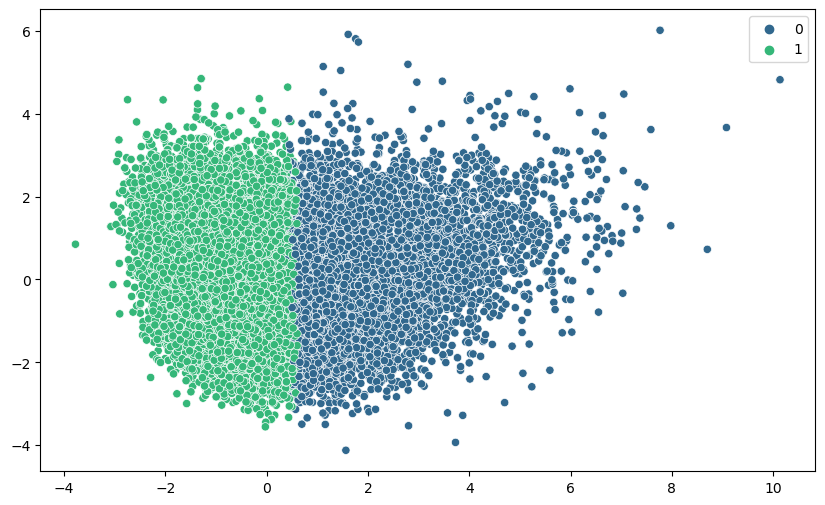

/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


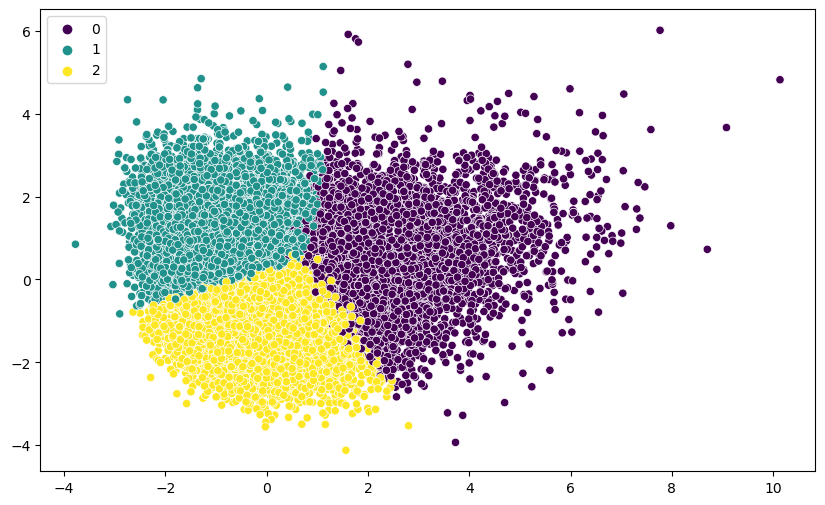

/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


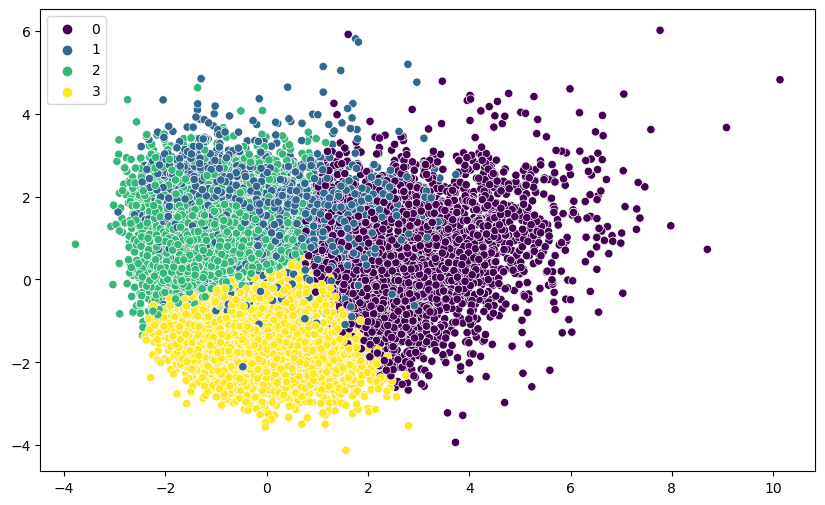

/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


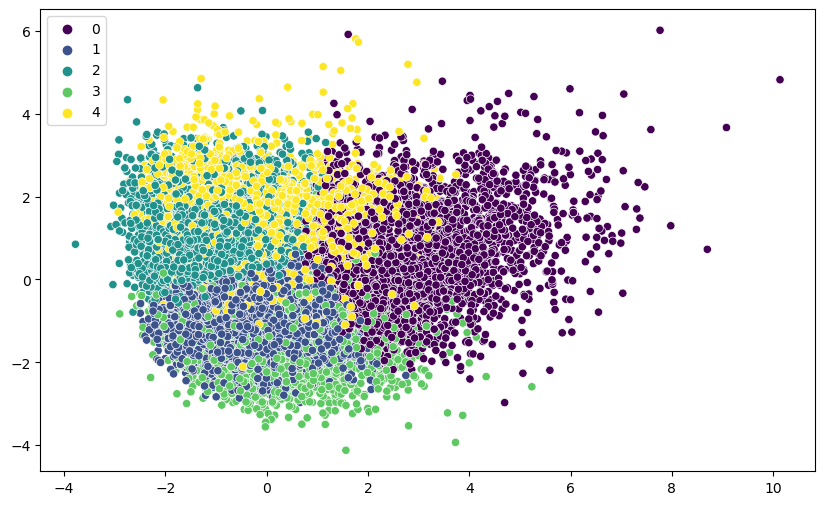

/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


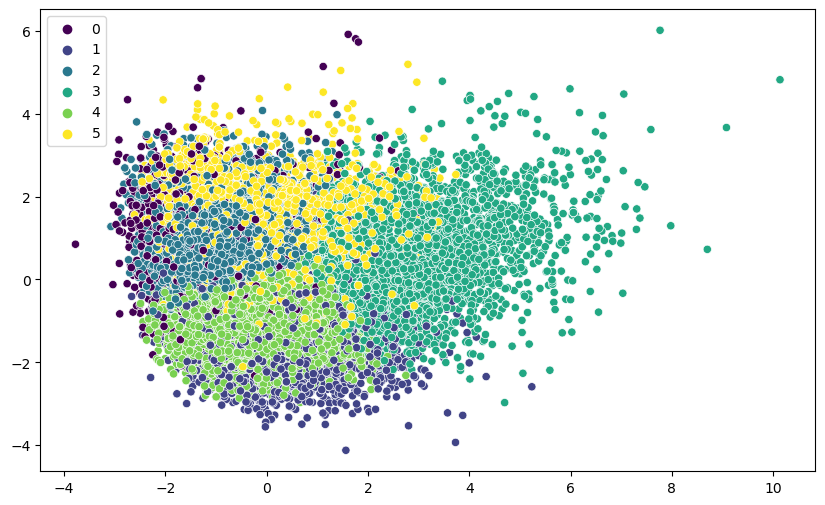

/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


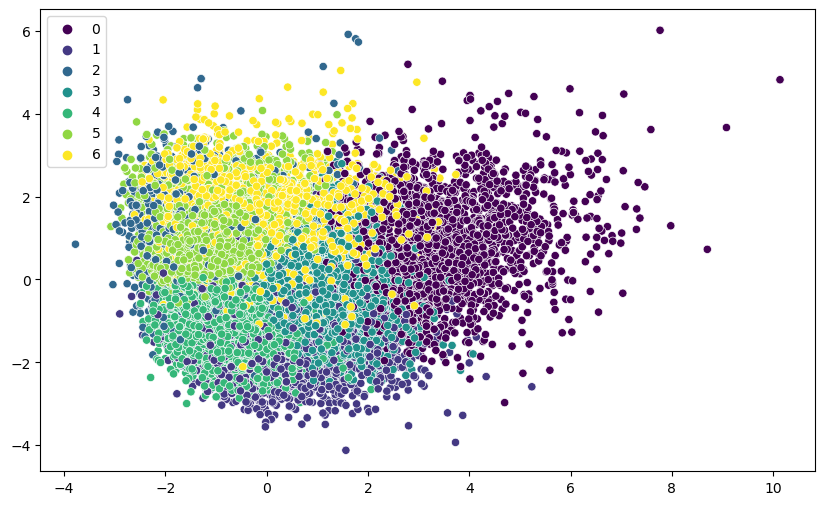

/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


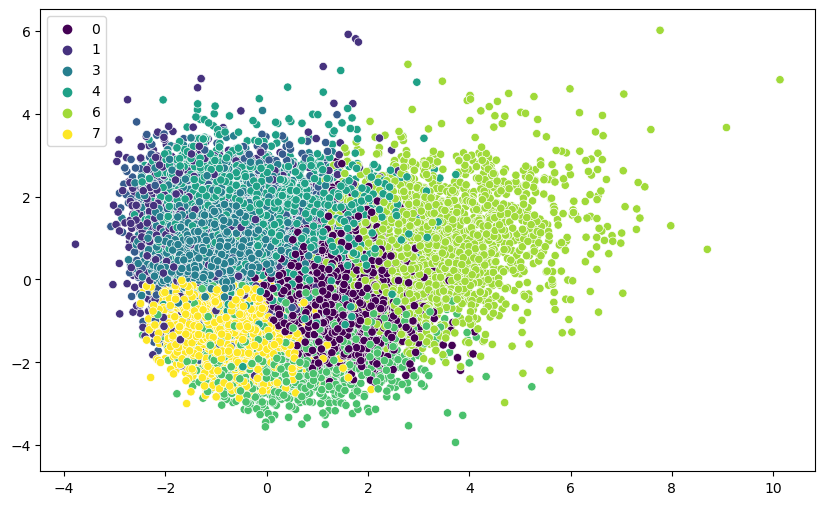

/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


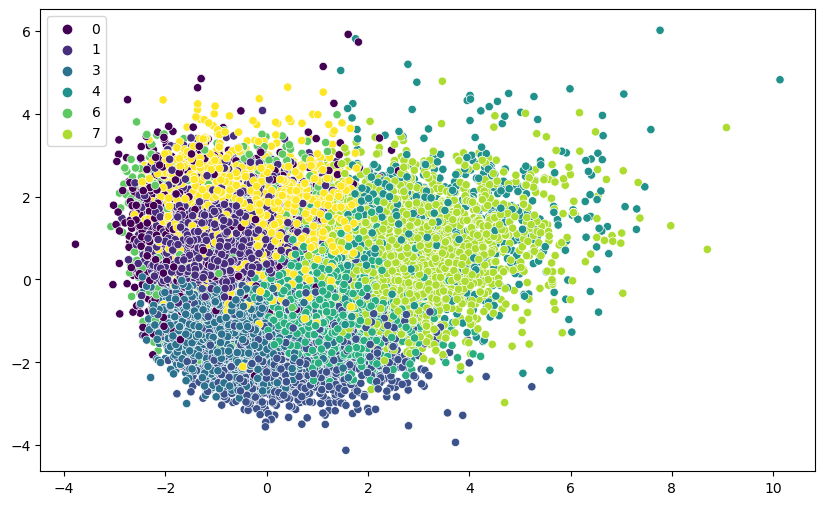

In [58]:
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rdc_feats)
    labels = kmeans.predict(rdc_feats)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=rdc_feats[:, 0], y=rdc_feats[:, 1], hue=labels, palette='viridis')
    plt.show()

The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

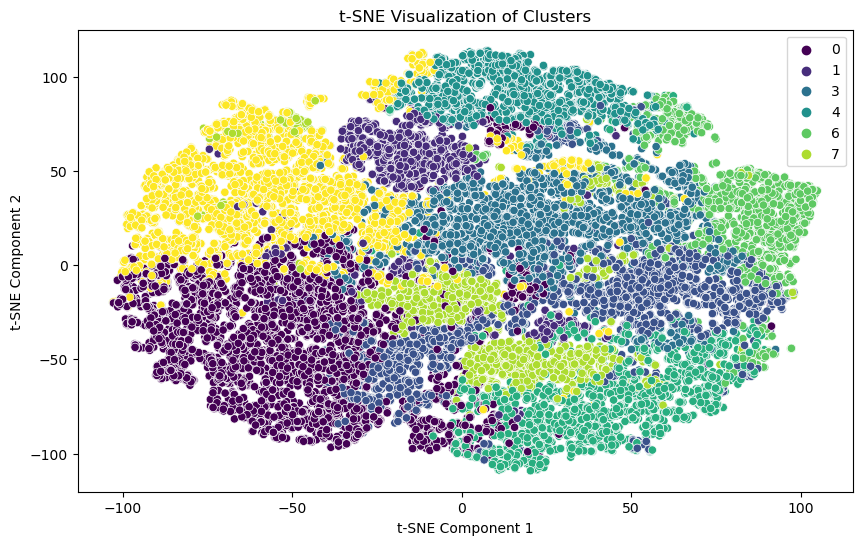

/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

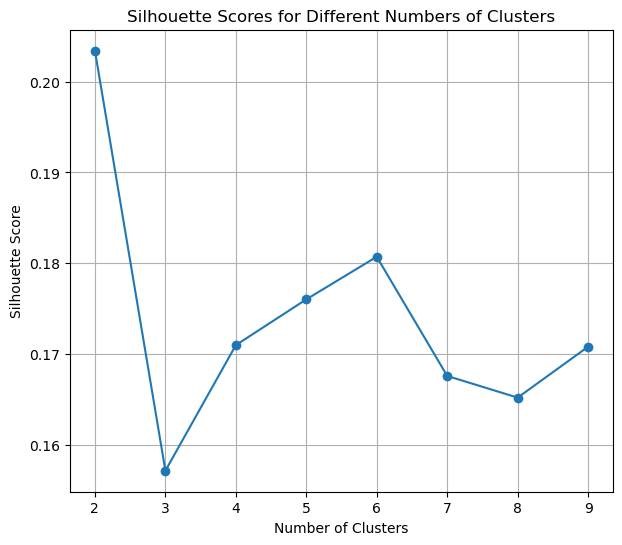

In [51]:
tsne_model = TSNE(n_components=2, random_state=42)
transformed_features = tsne_model.fit_transform(rdc_feats)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=transformed_features[:, 0], y=transformed_features[:, 1], hue=labels, palette='viridis')
plt.title('t-SNE Visualization ')
plt.show()
silhouette_scores = []
cluster_range = range(2, 10)
for n in cluster_range:
    kmeans_model = KMeans(n_clusters=n, random_state=42)
    kmeans_model.fit(rdc_feats)
    cluster_labels = kmeans_model.predict(rdc_feats)
    score = silhouette_score(rdc_feats, cluster_labels)
    silhouette_scores.append(score)
plt.figure(figsize=(7, 6))
plt.plot(cluster_range, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.title('Silhouette Scores ')
plt.grid(True)
plt.show()


# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [53]:
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rdc_feats)
    labels = kmeans.predict(rdc_feats)
    print("Number of Clusters:",i)
    for cluster in range(i):
        cluster_songs = df[labels == cluster]['track_name']
        if len(cluster_songs) >= 2:
            sample_songs = cluster_songs.sample(2)
            print("Cluster" ,cluster,":", sample_songs.values)
        else:
            print("Cluster", cluster,": Not enough")
    print()


/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 2
Cluster 0 : ['What it Takes' 'Alocate']
Cluster 1 : ['Soulstice' 'Been A While']



/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 3
Cluster 0 : ['Holding Up - Radio Edit' 'Breaking the Habit']
Cluster 1 : ['241 (My Favorite Song)' 'Happy Now']
Cluster 2 : ['Part Three' "I Don't Care (with Justin Bieber)"]



/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 4
Cluster 0 : ["It's You" 'Twisted']
Cluster 1 : ['Extra Credit' 'Under']
Cluster 2 : ['Phat Brahms (Steve Aoki & Angger Dimas vs. Dimitri Vegas & Like Mike) [Radio Edit]'
 'All Along the Watchtower']
Cluster 3 : ['Synonyms' 'Swing Back']



/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 5
Cluster 0 : ['Love in Your Mouth' 'Saturday Night - Radio Edit']
Cluster 1 : ['Deadwater' 'Norf Norf']
Cluster 2 : ['Mash' 'Elevare']
Cluster 3 : ["We Don't Care" 'Dimensions']
Cluster 4 : ['Party We Will Throw Now!' 'ASAP']



/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 6
Cluster 0 : ['Tú Conmigo' 'Paradise City']
Cluster 1 : ['Uptown Funk' 'Like a Stone']
Cluster 2 : ['1st & 10 (Featuring Infamous 2-0 & Fate Wilson)' 'Time Out']
Cluster 3 : ['Autumn 17' 'Move On']
Cluster 4 : ['Flip The Beat' 'I See You']
Cluster 5 : ['Dawn - ford. Remix' 'The Sky Is The Limit']



/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 7
Cluster 0 : ['Glad You Came' 'Despacito - Remix']
Cluster 1 : ['Bailar' 'Deep End']
Cluster 2 : ['Animals - Original Mix' 'Flight Level']
Cluster 3 : ['Our Show' 'Lo Que Siento']
Cluster 4 : ['Give It Here' "Dope's Gotta Hold On Me (feat. Ese Rich Roc)"]
Cluster 5 : ['Let Me Love You' "If I'm Not Your Lover"]
Cluster 6 : ['Midnight Hour with Boys Noize & Ty Dolla $ign' 'Texas Flood']



/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 8
Cluster 0 : ['Cold As Stone' 'Everything Goes Black']
Cluster 1 : ['You Give Me Something' 'Melanin']
Cluster 2 : ['Hold the Night' 'Ride Wit Me']
Cluster 3 : ['Bad Liar' 'Night Cruise']
Cluster 4 : ['Akhi Side' 'ELEMENT.']
Cluster 5 : ['Mr. Brightside' "Ain't It Fun"]
Cluster 6 : ['Sometimes When We Touch' 'Ann Wants to Dance']
Cluster 7 : ['Rhythm Of The Night' 'Flight to Paris']



/Users/danial/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 9
Cluster 0 : ['The Fleeting Deep' 'Tiimmy Turner']
Cluster 1 : ['Ivy' 'Pissing In a River']
Cluster 2 : ['Stay' 'Lights Out - 2008 Remastered Version']
Cluster 3 : ['Lips Are Movin' 'La Temperatura']
Cluster 4 : ['Lifeline' 'Straight Outta Compton']
Cluster 5 : ['Un Caballo Llamado Muerte - Live' 'Bennie And The Jets']
Cluster 6 : ['Ganitas' 'Árabe']
Cluster 7 : ['Like Yesterday' 'Outra Vez']
Cluster 8 : ['Fuck the Game' 'A Minute to Breathe']



Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

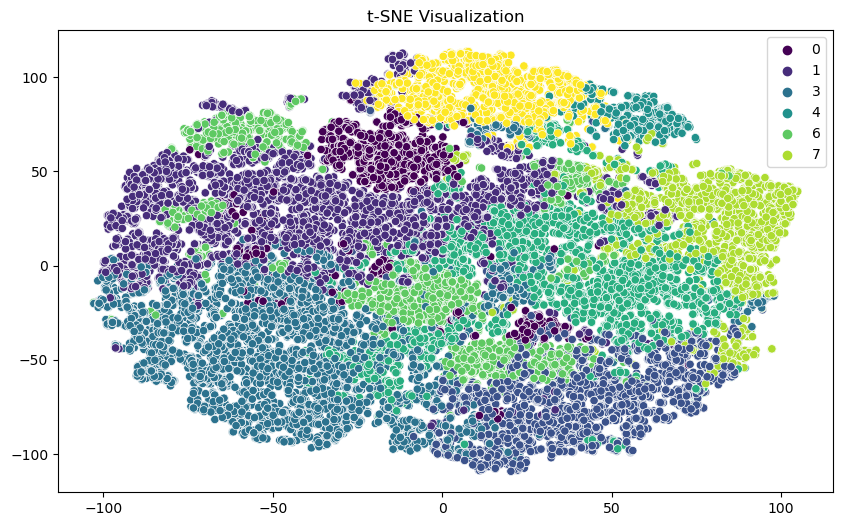

In [59]:
tsne = TSNE(n_components=2, random_state=42)
tsne_feats = tsne.fit_transform(rdc_feats)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_feats[:, 0], y=tsne_feats[:, 1], hue=labels, palette='viridis')
plt.title('t-SNE Visualization')
plt.show()
